In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import wave
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.ticker as ticker
import math

### Фильтр

In [ ]:
from abc import ABC, abstractmethod
from typing import List
from scipy import signal

class Filtration(ABC):
    """
    Абстрактный класс для определения общего интерфейса классов фильтрации.
    """
    @abstractmethod
    def create_filter(self, freq_sample_rate: float,
                      frequency: List[float],
                      order: int) -> tuple:
        """
        Абстрактная функция для определения общего интерфейса функции фильтрации.

        Args:
            freq_sample_rate: Частота дискретизации сигнала.
            frequency: Список частот для фильтрации.
            order: Порядок фильтра.

        Returns:
            filter_parameters: Кортеж из двух массивов, представляющих коэффициенты фильтра.
        """
        pass

    def filter_data(self, trace: List[float],
                    freq_sample_rate: float,
                    frequency: List[float],
                    order: int) -> List[float]:
        """
        Функция для применения фильтра к данным.

        Args:
            trace: Список данных для фильтрации.
            freq_sample_rate: Частота дискретизации сигнала.
            frequency: Список частот для фильтрации.
            order: Порядок фильтра.

        Returns:
            filtered_trace: Список отфильтрованных данных.
        """
        b, a = self.create_filter(freq_sample_rate, frequency, order)
        return signal.filtfilt(b, a, trace)

class BandPassFiltration(Filtration):
    """
    Класс для полосовой фильтрации данных.
    """

    def create_filter(self, freq_sample_rate: float,
                      frequency: List[float],
                      order: int) -> tuple:
        """Создает параметры полосового фильтра.

        Args:
            freq_sample_rate: Частота дискретизации сигнала.
            frequency: Список частот для фильтрации (min_freq, max_freq).
            order: Порядок фильтра.

        Returns:
            filter_parameters: Кортеж из двух массивов, представляющих коэффициенты фильтра.
        """
        min_freq, max_freq = frequency
        filter_parameters = signal.butter(order, [min_freq, max_freq], fs=freq_sample_rate, btype='band')
        return filter_parameters

# Пример использования для фильтрации частот от 1500 Гц до 2500 Гц
sample_rate = 5000  # Пример частоты дискретизации, установите по вашему сигналу
frequency_range = [1500, 2500]  # Диапазон частот для фильтрации
order = 4  # Порядок фильтра

# Создание объекта фильтрации
bandpass_filter = BandPassFiltration()

# Пример данных, которые нужно отфильтровать
data_to_filter = [1.0, 2.0, 3.0, 2.0, 1.0, 0.0]  # Замените на реальные данные

# Применение фильтрации
filtered_data = bandpass_filter.filter_data(data_to_filter, sample_rate, frequency_range, order)

print(filtered_data)


### Продолжение

In [ ]:
types = {
    1:  np.int8,
    2:  np.int16,
    4:  np.int32
}

In [ ]:
h

In [ ]:
def draw_random_file(folder_path):
    os.chdir(folder_path)
    filename = random.choice(os.listdir(folder_path))

    with wave.open(filename, 'rb') as wav:
        nchannels, sampwidth, framerate, nframes, comptype, compname = wav.getparams()
        peak = 256 ** sampwidth / 2

        data = wav.readframes(nframes)
        samples = np.frombuffer(data, dtype=np.int16)

        fig, axes = plt.subplots(nrows=nchannels * 3, ncols=1, figsize=(20, 18), dpi=72)

        if nchannels == 1:
            axes = [axes]

        for n in range(nchannels):
            channel = samples[n::nchannels]

            # Временная диаграмма
            ax_wave = axes[n * 3]
            ax_wave.plot(channel, color="g")
            ax_wave.set_facecolor("k")
            ax_wave.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format_db(x, peak)))
            ax_wave.grid(True, color="w")
            ax_wave.set_title(f"Waveform - Channel {n + 1}", color="black", fontsize=10)

            # Спектрограмма
            ax_spec = axes[n * 3 + 1]
            ax_spec.specgram(channel, NFFT=1024, Fs=framerate, noverlap=512, cmap='viridis')
            ax_spec.set_title(f"Spectrogram - Channel {n + 1}", color="black", fontsize=10)
            ax_spec.set_ylabel("Frequency (Hz)")
            ax_spec.set_xlabel("Time (s)")

            # Синусоиды на основе FFT (ограничение до 10 кГц)
            ax_fft = axes[n * 3 + 2]
            fft_values = np.fft.rfft(channel)
            fft_magnitudes = np.abs(fft_values)
            frequencies = np.fft.fftfreq(len(channel), d=1/framerate)
            frequencies = np.linspace(0, 1 / )
            ax_fft.plot(positive_freqs, positive_magnitudes, color="b")
            ax_fft.set_title(f"FFT (Frequency Spectrum up to 10 kHz) - Channel {n + 1}", color="black", fontsize=10)
            ax_fft.set_xlabel("Frequency (Hz)")
            ax_fft.set_ylabel("Magnitude")

        plt.suptitle(f"Waveform, Spectrogram, and FFT of {filename}", color="black", fontsize=14)

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

NameError: name 'samples' is not defined

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5760001 but corresponding boolean dimension is 11520000

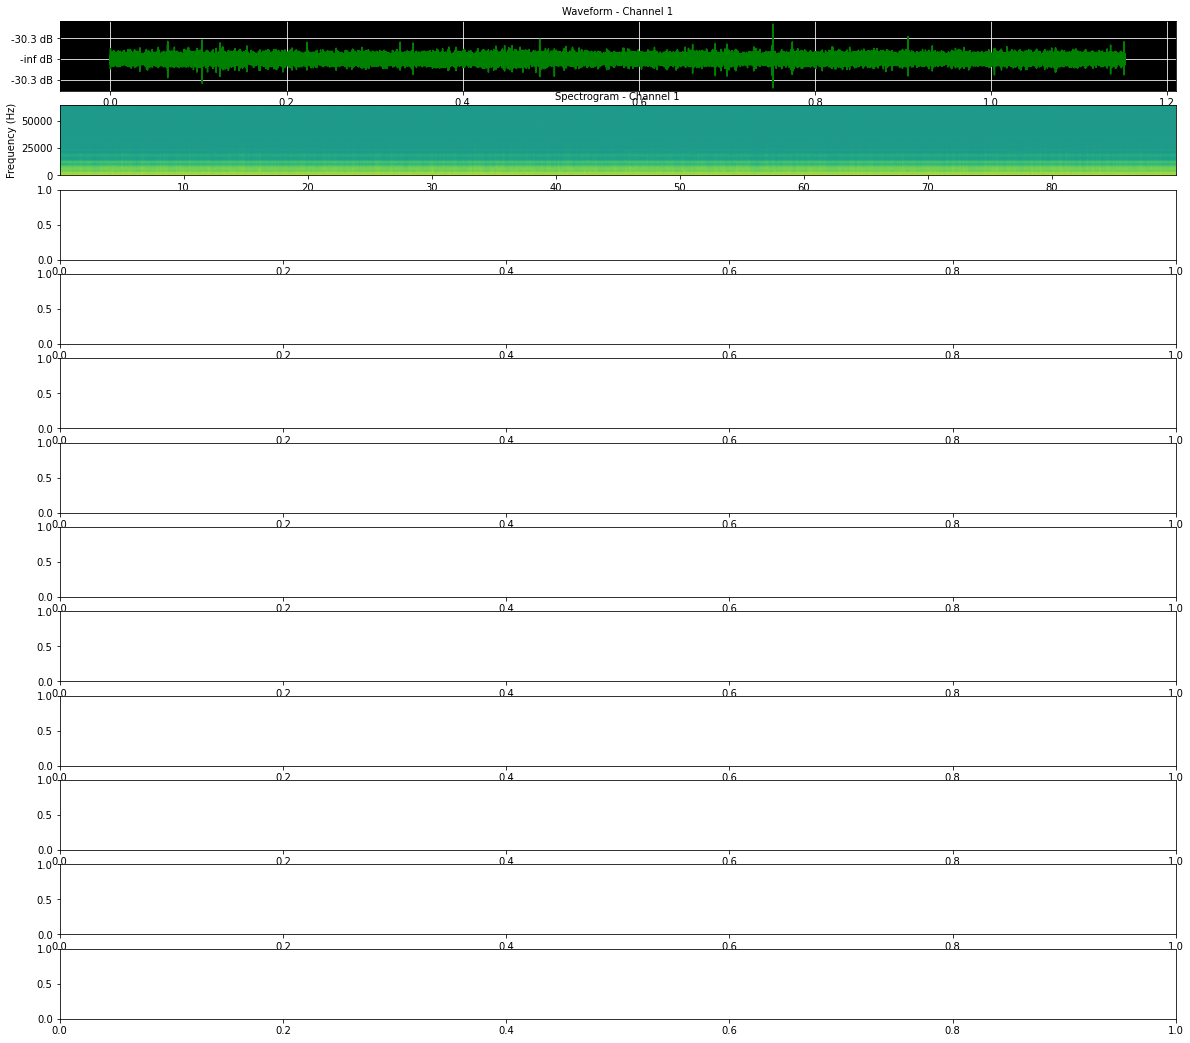

In [ ]:
draw_random_file('/content/drive/MyDrive/cookie_fest/sound_data/2024_06_01')

In [ ]:
import pandas as pd

times = os.listdir()
result_time = []
for _, time in enumerate(times):
  start_time, end_time = time[18:-4].split('_to_')[0], time[18:-4].split('_to_')[1]
  start_time = start_time.replace('__', '_').split('_')
  end_time = end_time.replace('__', '_').split('_')

  start_time_str = ''
  end_time_str = ''

  for i in range(0, 3):
    start_time_str += str(start_time[i]) + '-'
    end_time_str += str(end_time[i]) + '-'

  start_time_str = start_time_str[:-1]
  end_time_str = end_time_str[:-1]

  start_time_str += ' '
  end_time_str += ' '
  for i in range(3, 6):
    start_time_str += str(start_time[i]) + ':'
    end_time_str += str(end_time[i]) + ':'

  start_time_str = start_time_str[:-1]
  end_time_str = end_time_str[:-1]

  start_time = pd.to_datetime(start_time_str, format="%Y-%m-%d %H:%M:%S")
  end_time = pd.to_datetime(end_time_str, format="%Y-%m-%d %H:%M:%S")

  result_time.append([start_time, end_time])

print(result_time)

In [ ]:
times_df = pd.DataFrame(result_time, columns=['start_time', 'end_time'])
times_df.to_csv('times.csv', index=False)